In [3]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D

Se leen los datos normales

In [4]:
data_set = pd.read_csv("estaturas_normales.csv")

## Valores NaN

Se buscan valores NaN en el data set para que estos puedan ser reemplazados por la mediana (en el caso de las edades).

In [5]:
data_set.head(5)

,Estatura,Edad
0,1.77,26.0
1,1.74,31.0
2,1.72,24.0
3,1.78,NaN
4,1.65,32.0


In [6]:
data_set.isnull().sum()

Estatura    0
Edad        5
dtype: int64

In [7]:
median_edad = data_set["Edad"].median()
data_set["Edad"] = data_set["Edad"].fillna(median_edad)

In [8]:
data_set.isnull().sum()

Estatura    0
Edad        0
dtype: int64

In [9]:
data_set.head(5)

,Estatura,Edad
0,1.77,26.0
1,1.74,31.0
2,1.72,24.0
3,1.78,26.0
4,1.65,32.0


## Plot normal
Se visualiza la data normal, sin ninguna anomalia, se puede apreciar que esta parece agruparse.

Text(0, 0.5, 'Edad')

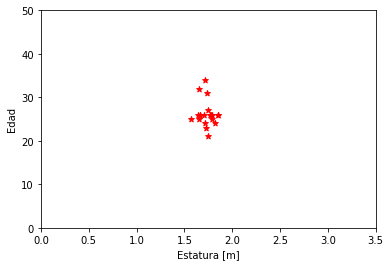

In [10]:
plt.scatter(data_set["Estatura"],data_set["Edad"], marker="*", color = "r")
plt.xlim(0,3.5)
plt.ylim(0,50)
plt.xlabel("Estatura [m]")
plt.ylabel("Edad")

Se cargan las anomalías.

In [11]:
data_anom = pd.read_csv("estaturas_anomalias.csv")

In [12]:
data_anom.head()

,Estatura,Edad
0,0.25,2.4
1,175.10,2.5
2,0.15,250.0
3,150.00,14.0


## Plot anomalias

Text(0, 0.5, 'Edad')

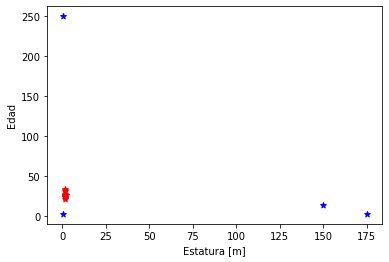

In [13]:
plt.scatter(data_set["Estatura"],data_set["Edad"], marker="*", color = "r")
plt.scatter(data_anom["Estatura"],data_anom["Edad"], marker="*", color = "b")
plt.xlabel("Estatura [m]")
plt.ylabel("Edad")

## Parametros

In [14]:
covarianza = np.cov(data_set.T)
print

<function print>

In [15]:
media = np.mean(data_set)

In [16]:
rv = multivariate_normal(mean = media, cov = covarianza)

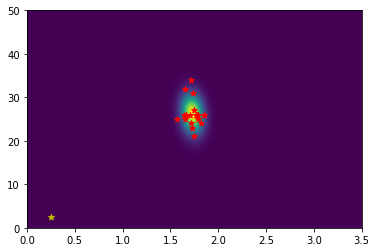

In [17]:
#xx, yy = np.meshgrid(data_set["Estatura"], data_set["Edad"])
xx, yy = np.meshgrid(np.linspace(0,30,1000), np.linspace(0,50,1000))
zz = np.empty(xx.shape + (2,))
zz[:, :, 0] = xx
zz[:, :, 1] = yy

plt.xlim(0,3.5)
plt.ylim(0,50)
plt.contourf(xx, yy, rv.pdf(zz),500)
plt.scatter(data_set["Estatura"],data_set["Edad"], marker="*", color = "r")
plt.scatter(data_anom["Estatura"],data_anom["Edad"], marker="*", color = "y")

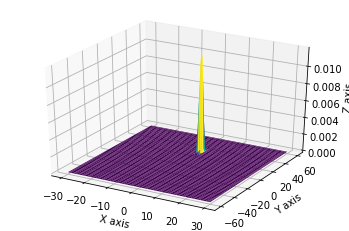

In [18]:
xx, yy = np.meshgrid(np.linspace(-30,30,100), np.linspace(-60,60,100))
zz = np.empty(xx.shape + (2,))
zz[:, :, 0] = xx
zz[:, :, 1] = yy

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(xx, yy, rv.pdf(zz),cmap='viridis',linewidth=0)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()

## Observando la pdf sin anomalia

In [22]:
print(rv.pdf(data_set))

[0.61991573 0.19057829 0.52654294 0.57160706 0.08109713 0.45630182
 0.34080054 0.19478851 0.19478851 0.15333959 0.39350183 0.5175754
 0.28925104 0.34812448 0.49295893 0.02429176 0.65779332 0.05770103
 0.45630182 0.66276039]


## Observando la pdf con anomalias

Se puede comparar que cuando se tienen anomalias estas tienen una pdf muy baja por la tanto se quiere establecer un parametro para discriminar estas anomalias

In [23]:
print(rv.pdf(data_anom))

[1.35797631e-110 0.00000000e+000 0.00000000e+000 0.00000000e+000]


## Función para detectar anomalias

In [24]:
def anomalia(dato, param):
    if rv.pdf(dato) < param:
        print("ANOMALIA")
    else:
        print("NORMAL")

In [25]:
anomalia([1.65,26], 0.01)

NORMAL


In [26]:
anomalia([0.1,26],0.01)

ANOMALIA
